In [1]:
# 1. matplotlib version updgrade (v3.2.2 to v3.4.1)
#!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__

'3.2.2'

In [10]:
# 2. 한글 폰트 설치
# https://velog.io/@jgpark1998/Colab-%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-RuntimeWarning-%EC%98%A4%EB%A5%98-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

### 코랩에서 import 해오는 디폴트 matplotlib 버전이 3.2.2였는데, 굳이 3.4.2 말고 3.2.2를 써야할까?  
  
### 따라서   
### 기존 버전 삭제 -> 한글폰트 설치 -> 3.4.2 버전 설치 -> 런타임 다시 시작(설치된 환경은 유지) 이런 순서를 따랐다.

In [2]:
# import libraries
import matplotlib.pyplot as plt #pyplot 이란 python에서 그림그리기 위한 도구모음
import seaborn as sns
import numpy as np

# 한글 사용
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# generate data: 월평균 주가

# 월
# 2020년 월 평균 주가
m2020 = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

# 삼성전자 월평균 주가
sec = [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]

# 카카오 월평균 주가
kakao = [32640, 35182, 31920, 33615, 45613, 52834, 64459, 74602, 75905, 71392, 72355, 75260]

# LG전자 월평균 주가
lge = [68860, 65820, 52949, 52748, 56216, 65089, 70857, 84090, 89524, 90789, 87202, 99738]

# 현대자동차 월평균 주가
hdm = [119700, 128012,  91800,  93258,  94808, 103291, 111326, 158588, 176226, 173697, 176762, 189095]

# 입력됐는지 확인
print("# 2020년 1월 ~ 12월")
print("-            월:", m2020)
print("- 삼성전자 주가:", sec)

# 2020년 1월 ~ 12월
-            월: ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
- 삼성전자 주가: [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]


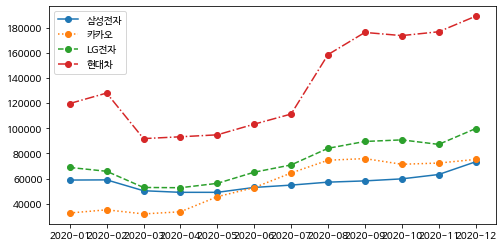

In [4]:
# 1. 상태기반(state-based)

plt.figure(figsize=(8, 4)) #8인치 x 4인치
plt.plot(m2020, sec, "o-", label="삼성전자") #가로: 연-월, 세로: 삼성주가 o--: 원형마커 
plt.plot(m2020, kakao, "o:", label="카카오")
plt.plot(m2020, lge, "o--", label="LG전자")
plt.plot(m2020, hdm, "o-.", label="현대차")
plt.legend()

상태기반 state based interface  
  
시간순으로 그림을 그리는 방식(절차지향 프로그래밍 처럼 동작한다고 생각하면 편함)  
앞서 그려진 것에서 덧붙인다 생각하면 편하다

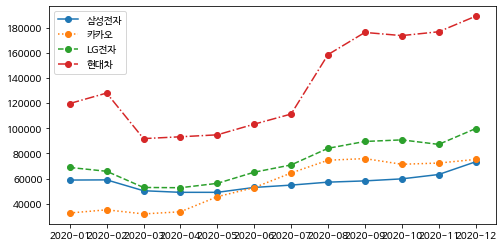

In [5]:
# 2. 객체지향(object-oriented)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec, "o-", label="삼성전자")
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="LG전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

Object-oriented  :  
figure라는 도화지를 깔고  
그 도화지 안에 그림을 그려준다.  
ax : 좌표축에 매개를 그려준다??  

데이터가 추가될 추가 공간만 호출한다  

In [6]:
# 3. 수익률 비교
# - 월별 평균 주가 연초 시초가로 나눔

sec_rate = np.array(sec)/sec[0] - 1 #np.array를 한 이유 : sec[0]로 나머지 전체를 broadcast연산으로 적용하려고
kakao_rate = np.array(kakao)/kakao[0] - 1
lge_rate = np.array(lge)/lge[0] - 1
hdm_rate = np.array(hdm)/hdm[0] - 1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


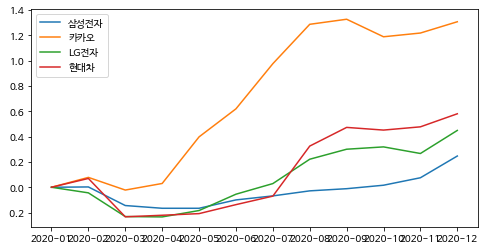

In [7]:
#주가 변화율
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

<matplotlib.legend.Legend at 0x7f433befe890>/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)  
    
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)  

검색해보면 나눔바른 고딕에 " - " 기호가 없어서 생기는 warning이다

(-0.5, 1.5)

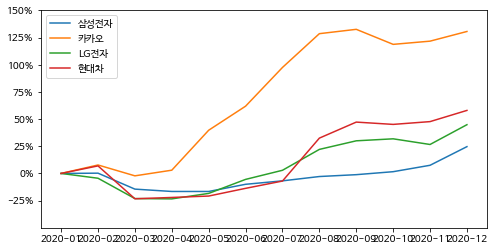

In [10]:
# 4. y축 눈금 정비, - 사라짐 문제 해결

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, ) # 시작점이 너무 바닥으로 가지 않게 띄우는 방식, 얘가 없다면 너무 그래프가 바닥에서 시작한다


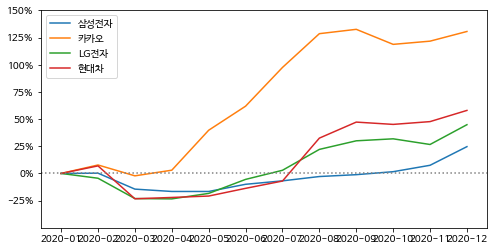

In [11]:
# 5. 손익이 잘 드러나게 변경

ax.axhline(y=0, c="gray", ls=":") #수평선을 긋는 메서드 : Add a horizontal line across the axis.
display(fig)

3월을 좀 잘 나타내고 싶다, label을 문자열로 출력했기 때문에 label을 수정해보자

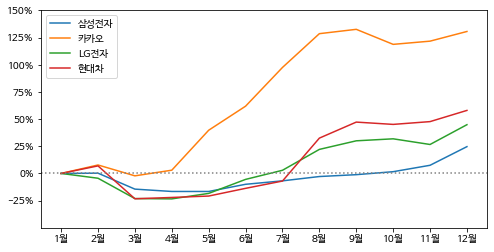

In [12]:
# 6. 가로축을 깔끔하게 변경

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)
display(fig)

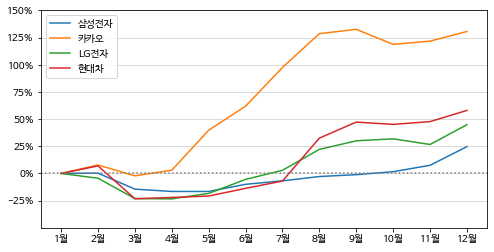

In [13]:
# 7. y축 grid 추가

ax.grid(axis="y", c="lightgray")
display(fig)

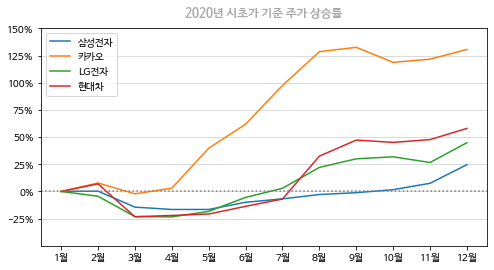

In [14]:
# 8. title 추가

ax.set_title("2020년 시초가 기준 주가 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
display(fig)

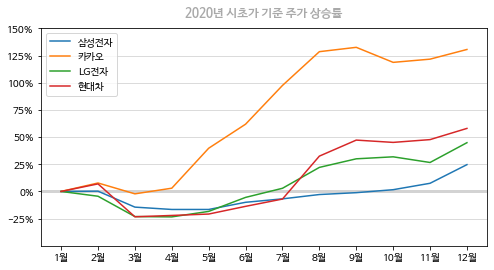

In [15]:
# 전체 코드 정리

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, sec_rate, label="삼성전자")  # line plot
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점 *

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

기업의 기업 색깔과 매칭이 되지 않을 수 있다.

In [16]:
# 기업 색상 (RGB)

sec_c = np.array([52, 117, 162])/255   # 현대랑 겹치므로 조금 더 밝게 np.array([12, 77, 162])/255 삼성 원 색깔
kakao_c = np.array([230, 207, 1])/255  # 너무 밝아서 조금만 어둡게 np.array([250, 227, 1])/255
lge_c = np.array([203, 10, 55])/255
hdm_c = np.array([1, 44, 95])/255
#255로 나눈이유? -> 

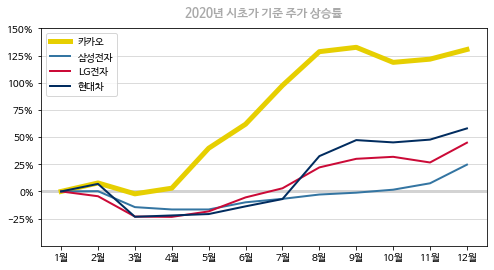

In [19]:
# 카카오 강조

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot *
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

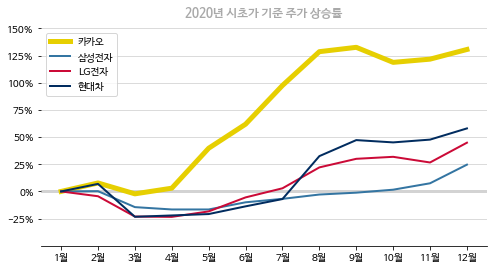

In [25]:
# 불필요한 테두리(spine) 지우기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기 *
#unhashable list ???

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

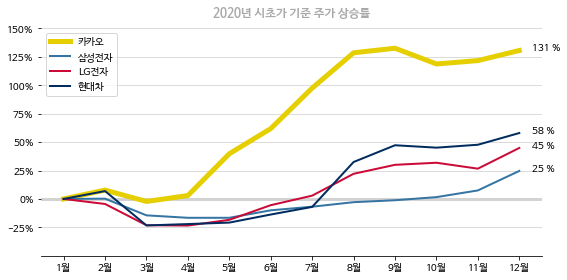

In [27]:
# 상승률 숫자 달기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률 *
for r in [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]:
    ax.text(11.3, r, f"{r*100:.0f} %")


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

fig.tight_layout()

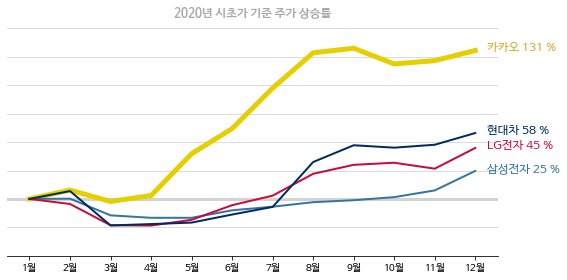

In [29]:
# legend 떼고 회사 색상 입히기, y축 눈금 제거하기

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 회사 이름 + 상승률 * 
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)  

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks) #grid는 ticks 와 붙어있기 때문에 여기에 빈 리스트를 넣으면 안된다.
ax.set_yticklabels([])
ax.set_ylim(-0.5, )
ax.tick_params(axis="y", length=0) # y축 눈금 지우기

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False) 

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

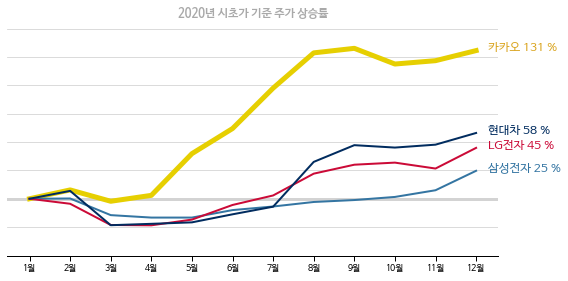

In [35]:
# context 설정
sns.set_context("paper")

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.set_ylim(-0.5, )
ax.tick_params(axis="y", length=0) # y축 눈금 지우기

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False) 

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

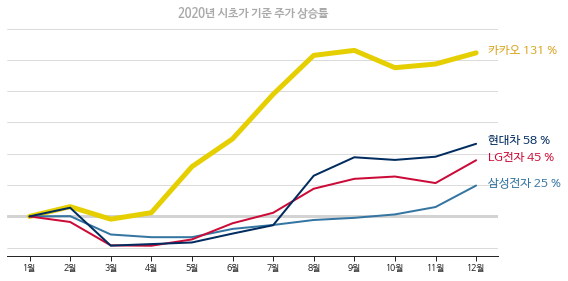

In [36]:
# style 설정
sns.set_style("ticks")
plt.rc('font', family='NanumBarunGothic') 

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]
for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r*100:.0f} %", color=c, fontsize=12)


xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.tick_params(axis="y", length=0)

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False) 

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

# ax.legend()
fig.tight_layout()

In [37]:
### Appendix. 주가 데이터 가져오기

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [38]:
# https://jjeongil.tistory.com/656

# file_name 다운로드한 주가 데이터를 저장할 파일 이름
# company_code 종목 코드
# year1/month1/date1 데이터를 다운로드할 시작일
# year2/month2/date2 데이터를 다운로드할 마감일
def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
    df = web.DataReader("%s.KS" % (company_code), "yahoo", start, end)
    df.to_pickle(file_name)
    return df


def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df


download_stock_data('sec.data', '005930', 2016, 1, 1, 2020, 12, 31) #종목 코드
df_sec = load_stock_data('sec.data')

download_stock_data('lge.data', '066570', 2016, 1, 1, 2020, 12, 31)
df_lge = load_stock_data('lge.data')

download_stock_data('kakao.data', '035720', 2016, 1, 1, 2020, 12, 31)
df_kakao = load_stock_data('kakao.data')

download_stock_data('hdm.data', '005380', 2016, 1, 1, 2020, 12, 31)
df_hdm = load_stock_data('hdm.data')

In [39]:
df_kakao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,23500.0,23060.0,23500.0,23060.0,1488435.0,22928.773438
2016-01-05,23500.0,22760.0,22820.0,23420.0,1590180.0,23286.726562
2016-01-06,24220.0,23460.0,23600.0,23820.0,2720685.0,23684.451172
2016-01-07,24100.0,23320.0,23680.0,23460.0,1710970.0,23326.500000
2016-01-08,23180.0,22740.0,23060.0,23040.0,2000230.0,22908.888672
...,...,...,...,...,...,...
2020-12-23,77100.0,75400.0,76200.0,75500.0,3149760.0,75469.640625
2020-12-24,76000.0,74400.0,75700.0,74800.0,2325660.0,74769.921875
2020-12-28,75400.0,73900.0,74900.0,74600.0,3232320.0,74570.000000


open 시가  
high 고가  
low 저가  
close 종가  
volume 거래량  
Adj Close 주식의 분할, 배당, 배분 등을 고려해 조정한 종가  

In [40]:
def calc_mavg(df):
    df = df.reset_index()
    df["y_m"] = df["Date"].dt.to_period("M")
    df["avg"] = df[["Open", "Close"]].mean(axis=1)
    return np.round(df.groupby("y_m").mean()["avg"].values, 0).astype(int)

sec_2020 = calc_mavg(df_sec)
kakao_2020 = calc_mavg(df_kakao)
lge_2020 = calc_mavg(df_lge)
hdm_2020 = calc_mavg(df_hdm)

In [41]:
sec_2020

array([23140, 23312, 25087, 25680, 25552, 28055, 29883, 31866, 31607,
       32045, 32445, 35461, 37413, 38574, 41028, 41934, 45571, 46518,
       49364, 46977, 50118, 53979, 55518, 50762, 50021, 47331, 49648,
       50091, 51255, 48449, 46270, 45856, 46071, 43607, 43379, 39820,
       41508, 46340, 44551, 46075, 43074, 44764, 46246, 43856, 47192,
       49907, 52232, 53501, 58842, 58988, 50357, 49086, 49086, 52968,
       54828, 57170, 58176, 59787, 63255, 73343])